In [193]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from fnmatch import fnmatch
import scipy.stats as stats

In [10]:
def logistic_function(x, L, k, x0):
    return L/(1 + np.exp(-k*(x-x0)))

In [11]:
def return_test_data(xrange, L=1, k=1, x0=0):
    return logistic_function(xrange, L, k, x0)

In [64]:
def generate_noise(xrange, magnitude=5):
    pass

In [120]:
def recursive_middle_finder(start, end, array):
    if(end-start==2):
        return start+1
    if(array[start + (end-start)//2]>(array[start]+array[end])/2):
        return recursive_middle_finder(start, start + (end-start)//2, array)
    else:
        return recursive_middle_finder(start + (end-start)//2, end, array)

In [185]:
def recursive_binary_search(start, end, array, value):
    if(end-start==2):
        return start+1
    if(array[start + (end-start)//2]>value):
        return recursive_middle_finder(start, start + (end-start)//2, array)
    else:
        return recursive_middle_finder(start + (end-start)//2, end, array)

In [181]:
DAC_range   = np.arange(0,1023)
noise_width = 15
clean_data  = (np.rint(return_test_data(DAC_range, L=(2**15)-1, k=.04, x0=350))).astype(int)
noisy_data  = clean_data + np.random.randint(-noise_width, noise_width, DAC_range.size)
reduced_DAC = DAC_range[:-1]

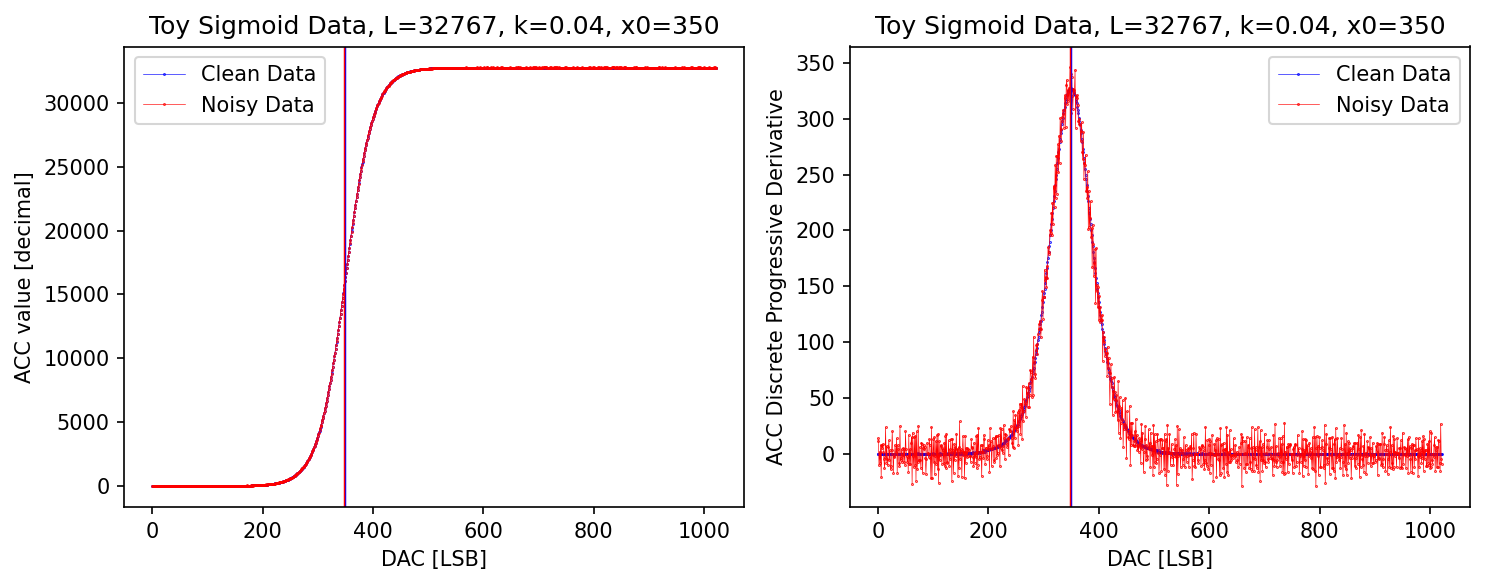

In [182]:
fig = plt.figure(dpi=150, figsize=(10,4))
gs  = fig.add_gridspec(1,2)
ax  = fig.add_subplot(gs[0,0])
plt.plot(DAC_range, clean_data, 'b.-', label="Clean Data", lw=0.3, ms=0.7)
plt.plot(DAC_range, noisy_data, 'r.-', label="Noisy Data", lw=0.3, ms=0.7)
plt.axvline(DAC_range[recursive_middle_finder(0, len(clean_data)-1, clean_data)], c='b', lw=0.7)
plt.axvline(DAC_range[recursive_middle_finder(0, len(noisy_data)-1, noisy_data)], c='r', lw=0.7)
plt.xlabel("DAC [LSB]")
plt.ylabel("ACC value [decimal]")
plt.title(f"Toy Sigmoid Data, L={2**15 - 1}, k=0.04, x0=350")
plt.legend()
ax  = fig.add_subplot(gs[0,1])
plt.plot(reduced_DAC, clean_data[1:]-clean_data[:-1], 'b.-', label="Clean Data", lw=0.3, ms=0.7)
plt.plot(reduced_DAC, noisy_data[1:]-noisy_data[:-1], 'r.-', label="Noisy Data", lw=0.3, ms=0.7)
plt.axvline(DAC_range[recursive_middle_finder(0, len(clean_data)-1, clean_data)], c='b', lw=0.7)
plt.axvline(DAC_range[recursive_middle_finder(0, len(noisy_data)-1, noisy_data)], c='r', lw=0.7)
plt.xlabel("DAC [LSB]")
plt.ylabel("ACC Discrete Progressive Derivative")
plt.title(f"Toy Sigmoid Data, L={2**15 - 1}, k=0.04, x0=350")
plt.legend()
plt.tight_layout()
plt.show()

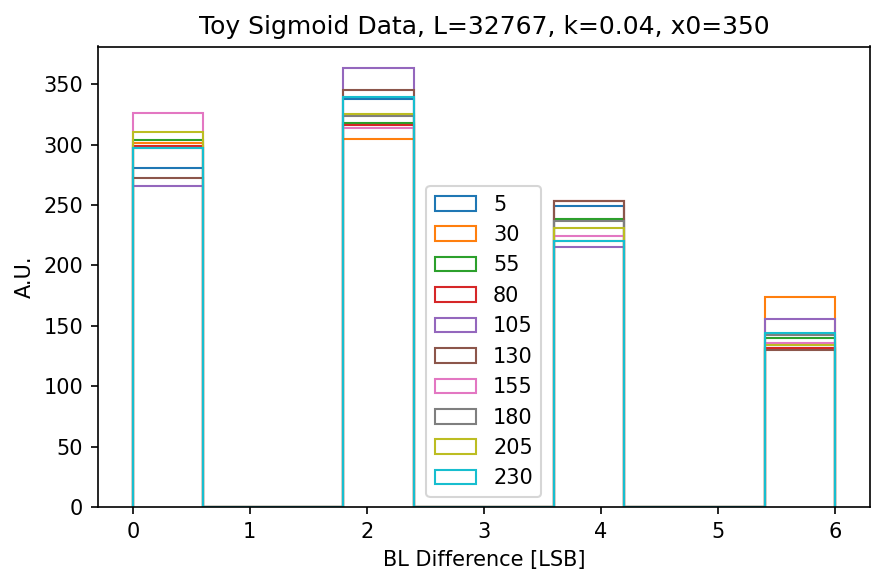

In [192]:
number_of_trials = 1000
noise_width = 25
BL_diffs  = {}
clean_idx = recursive_middle_finder(0, len(clean_data)-1, clean_data)
width_scan = np.arange(5, 250, 25)
for w in width_scan:
    BL_diffs[w] = []
    for i in range(number_of_trials):
        noisy_data = clean_data + np.random.randint(-noise_width, noise_width, DAC_range.size)
        noisy_idx  = recursive_middle_finder(0, len(noisy_data)-1, noisy_data)
        BL_diffs[w].append(DAC_range[clean_idx] - DAC_range[noisy_idx])
    BL_diffs[w] = np.array(BL_diffs[w])

fig = plt.figure(dpi=150, figsize=(6,4))
gs  = fig.add_gridspec(1,1)
ax  = fig.add_subplot(gs[0,0])
for w in width_scan:
    plt.hist(BL_diffs[w], histtype="step", label=f"{w}")
plt.xlabel("BL Difference [LSB]")
plt.ylabel("A.U.")
plt.title(f"Toy Sigmoid Data, L={2**15 - 1}, k=0.04, x0=350")
plt.legend()
plt.tight_layout()
plt.show()

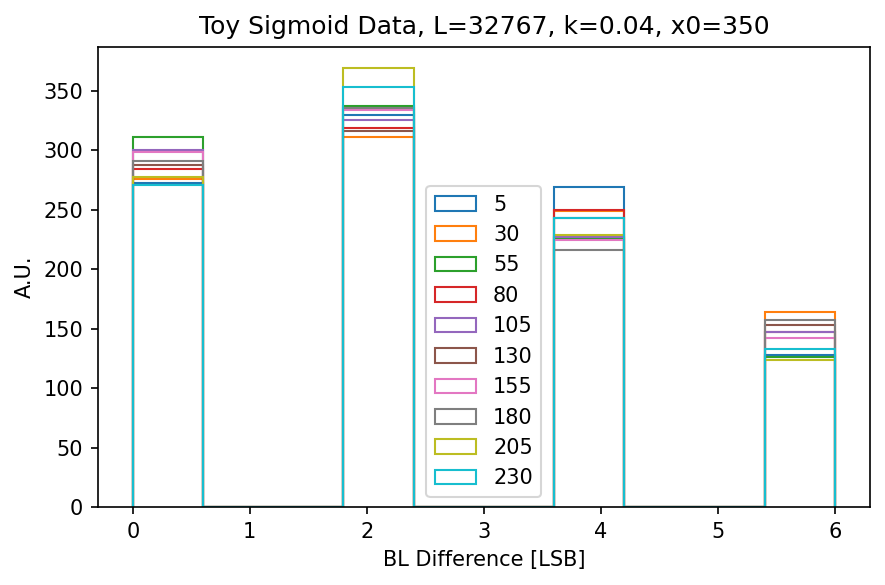

In [191]:
number_of_trials = 1000
noise_width = 25
BL_diffs  = {}
clean_idx = recursive_binary_search(0, len(clean_data)-1, clean_data, (2**15-1)/2)
width_scan = np.arange(5, 250, 25)
for w in width_scan:
    BL_diffs[w] = []
    for i in range(number_of_trials):
        noisy_data = clean_data + np.random.randint(-noise_width, noise_width, DAC_range.size)
        noisy_idx  = recursive_binary_search(0, len(noisy_data)-1, noisy_data, (2**15-1)/2)
        BL_diffs[w].append(DAC_range[clean_idx] - DAC_range[noisy_idx])
    BL_diffs[w] = np.array(BL_diffs[w])

fig = plt.figure(dpi=150, figsize=(6,4))
gs  = fig.add_gridspec(1,1)
ax  = fig.add_subplot(gs[0,0])
for w in width_scan:
    plt.hist(BL_diffs[w], histtype="step", label=f"{w}")
plt.xlabel("BL Difference [LSB]")
plt.ylabel("A.U.")
plt.title(f"Toy Sigmoid Data, L={2**15 - 1}, k=0.04, x0=350")
plt.legend()
plt.tight_layout()
plt.show()